# Atividade 5

Nesta atividade iremos trabalhar com o problema de classificação de dígitos em imagens, utilizando o conhecido conjunto de dados MNIST.

O conjunto de dados é formado por imagens preto e branco de 28x28 pixels que representam dígitos escritos à mão, de 0 à 9. Cada pixel possui um valor entre 0 (totalmente preto) e 255 (totalmente branco). O desafio é treinar um modelo para reconhecer corretamente cada dígito representado. Ou seja, é um problema de classificação multi-classe de 10 classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). O conjunto já é previamente dividido em treino e teste.

Dado esse problema, faça o que se pede:

    1. Treine e avalie (no conjunto de teste) um classificador baseline com uma MLP de uma camada. Defina a quantidade de neurônios na camada oculta e argumente o motivo da sua escolha. Utilize métricas de desempenho para classificação multiclasse de sua escolha.

    2. Crie uma arquitetura de MLP realizando a otimização de hiperparâmetros, usando uma técnica da sua escolha (grid search, random search). Os hiperparâmetros que serão otimizados são de sua escolha, mas devem conter o número de camadas e o número de neurônios em cada camada. Teste o melhor modelo encontrado no conjunto de teste e compare com o baseline.


In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
(X_train_valid, y_train_valid), (X_test, y_test) = mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid, test_size=0.2, random_state=42)


In [3]:
image_size = X_train_valid.shape[1] 
input_size = image_size * image_size
print(f'Shape X_train_valid: {X_train_valid.shape}')
print(f'Shape X_valid: {X_valid.shape}')

Shape X_train_valid: (60000, 28, 28)
Shape X_valid: (12000, 28, 28)


In [4]:
X_train_valid = np.reshape(X_train_valid, [-1, input_size])
X_test = np.reshape(X_test, [-1, input_size])
X_valid = np.reshape(X_valid, [-1, input_size])
X_train = np.reshape(X_train, [-1, input_size])

In [5]:
scaler = MinMaxScaler()
X_train_valid = scaler.fit_transform(X_train_valid)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

### 1° Parte - Baseline

In [17]:
MLP = MLPClassifier()
MLP.fit(X_train_valid, y_train_valid)
y_predict = MLP.predict(X_test)
AB = accuracy_score(y_test, y_predict)
AB

0.9787

#### Comparação do modelo com diferentes quantidades de neurônios

In [6]:
from time import time
a = []
tempo= []
for l in [500, 1000, 1200, 1500]:
    t = time()
    MLP = MLPClassifier(hidden_layer_sizes=(l,))
    MLP.fit(X_train, y_train)
    fim = time() - t
    y_predict = MLP.predict(X_valid)
    A1 = accuracy_score(y_valid, y_predict)
    a.append(A1)
    tempo.append(fim)

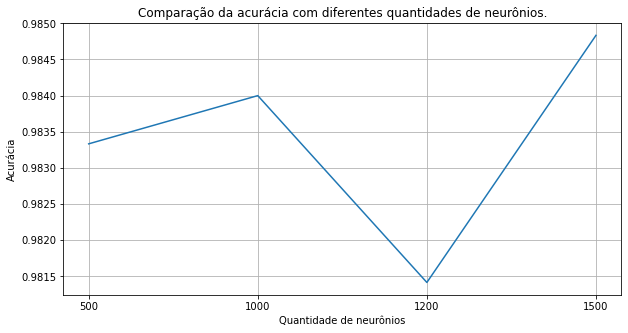

In [7]:
l = [500, 1000, 1200, 1500]
N = len(l)
l2 = np.arange(N)
plt.subplots(figsize=(10, 5))
plt.plot(l2, a)
plt.xticks(l2,l)
plt.grid(True)
plt.xlabel("Quantidade de neurônios")
plt.ylabel("Acurácia")
plt.title('Comparação da acurácia com diferentes quantidades de neurônios.', fontsize=12)
plt.show()

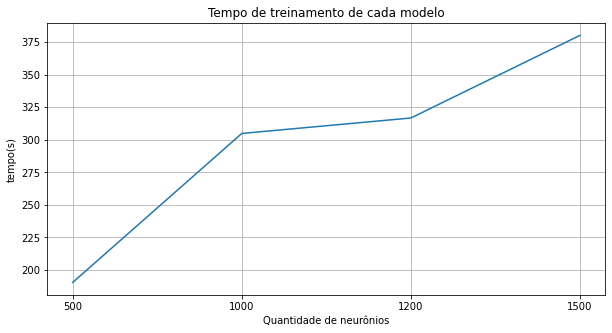

In [8]:
plt.subplots(figsize=(10, 5))
plt.plot(l2, tempo)
plt.xticks(l2,l)
plt.grid(True)
plt.xlabel("Quantidade de neurônios")
plt.ylabel("tempo(s)")
plt.title('Tempo de treinamento de cada modelo', fontsize=12)
plt.show()

### 2° Parte - Otimização de Hiperparâmetros utilizando RandomSearch

In [9]:
# O RandomSearch já realiza a separação do conjunto de treino e validação, então esse modelo foi treinado com o conjunto 
# X_train_valid e testado no conjunto de teste.

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint as sp_randint
from warnings import filterwarnings
filterwarnings('ignore')
parameters = dict(
    alpha= [10**uniform.rvs(loc = -5, scale = 4)],
    hidden_layer_sizes= [(sp_randint.rvs(100,600,1),sp_randint.rvs(100,600,1),), (sp_randint.rvs(100,600,1),),],
    activation= ['relu','logistic'],
)

In [11]:
MLP1 = MLPClassifier(early_stopping=True)
clf = RandomizedSearchCV(MLP1, parameters, random_state=42, return_train_score=False)
clf.fit(X_train_valid, y_train_valid.ravel())
clf.best_estimator_

MLPClassifier(alpha=0.002717532226229797, early_stopping=True,
              hidden_layer_sizes=(516,))

In [12]:
y_predict2 = clf.predict(X_test)
A2 = accuracy_score(y_test, y_predict2)
A2

0.9836

### Outras opções:

##### 1° Modelo

In [13]:
MLP = MLPClassifier(hidden_layer_sizes=(500, 200), alpha=0.001, learning_rate_init=0.01, max_iter=300, early_stopping= True)
MLP.fit(X_train, y_train)
y_predict = MLP.predict(X_valid)
A3 = accuracy_score(y_valid, y_predict)
A3

0.9735

##### 2° Modelo

In [14]:
MLP = MLPClassifier(hidden_layer_sizes=(500, 200, 100), alpha=0.001, learning_rate_init=0.01, max_iter=300, early_stopping= True)
MLP.fit(X_train, y_train)
y_predict = MLP.predict(X_valid)
A4 = accuracy_score(y_valid, y_predict)
A4

0.976

#### O 2° Modelo foi um pouco melhor que o primeiro, então ele irá ser treinado no conjunto de teste.

In [15]:
MLP = MLPClassifier(hidden_layer_sizes=(500, 200, 100), alpha=0.001, learning_rate_init=0.01, max_iter=300, early_stopping= True)
MLP.fit(X_train_valid, y_train_valid)
y_predict = MLP.predict(X_test)
A4 = accuracy_score(y_test, y_predict)
A4

0.9738

### Comparação entre os modelos treinados no conjunto de teste.

In [18]:
import pandas as pd
data = {'Modelos': ['Baseline', 'RandomSearch', '2° Modelo'],
        'accuracy': [AB, A2, A4],
        }
tabela = pd.DataFrame(data)
tabela

,Modelos,accuracy
0,Baseline,0.9787
1,RandomSearch,0.9836
2,2° Modelo,0.9738
